In [4]:
import numpy as np
import nltk
import re

Here we import necessary packages for the N-Gram model. 

In [6]:

def ngrams_from_text(text, n):
  ngrams = [text[i:i+n] for i in range(len(text) - (n-1))]
  nminusone_grams = [tuple(text[i:i+n-1]) for i in range(len(text) - (n-1))]

  ngram_counts = {}
  nminusone_gram_counts = {}
  total_ngrams = len(ngrams)
  for ngram in ngrams:
    nminusone_gram = tuple(ngram[:-1])
    next_word = ngram[-1]

    if nminusone_gram not in ngram_counts:
      ngram_counts[nminusone_gram] = {}
      nminusone_gram_counts[nminusone_gram] = 0

    nminusone_gram_counts[nminusone_gram] += 1

    if next_word not in ngram_counts[nminusone_gram]:
      ngram_counts[nminusone_gram][next_word] = 0

    ngram_counts[nminusone_gram][next_word] += 1

  for nminusone_gram in ngram_counts:
    count = nminusone_gram_counts[nminusone_gram]

    for next_word in ngram_counts[nminusone_gram]:
      ngram_counts[nminusone_gram][next_word] /= count

  for nminusone_gram in nminusone_gram_counts:
    nminusone_gram_counts[nminusone_gram] /= total_ngrams

  return [n, nminusone_gram_counts, ngram_counts]



This function, `ngrams_from_text`, generates and calculates the probabilities of n-grams and (n-1)-grams from a given text. It takes in a string `text` and an integer `n`, representing the desired n-gram length. The function first creates two lists: `ngrams`, which contains all possible sequences of `n` consecutive characters, and `nminusone_grams`, which holds the (n-1)-grams as tuples. 

Next, it calculates frequency counts for each (n-1)-gram as well as the probabilities of observing each possible following character (or "next word") for each (n-1)-gram. Finally, these frequencies are normalized to represent probabilities, where `ngram_counts` stores the probability distribution for each "next word" following an (n-1)-gram, and `nminusone_gram_counts` gives the normalized probability of each (n-1)-gram across all generated n-grams. The function returns a list containing `n`, the probability distribution for (n-1)-grams, and the conditional probability distribution for n-grams.

In [8]:
def sample_ngram(model, length):

  n, nminusone_grams, ngrams = model

  start_index = np.random.choice(list(range(len(nminusone_grams.keys()))), p=list(nminusone_grams.values()))
  start = list(nminusone_grams.keys())[start_index]
  sampled = list(start)

  for _ in range(length):
    if n == 1:
      prev = tuple([])
    else:
      prev = tuple(sampled[-1*(n-1):])
    next = np.random.choice(list(ngrams[prev].keys()), p=list(ngrams[prev].values()))
    sampled.append(next)

  return " ".join(sampled)

The `sample_ngram` function generates a random sequence of text based on an n-gram model. It starts by picking an initial (n-1)-gram, then iteratively adds the next element by sampling from probabilities of what usually follows that (n-1)-gram in the original text. The result is a sequence that mimics the structure and patterns of the input text.

In [10]:
with open('/Users/maddiegupta/Desktop/trainENG.txt', 'r') as file:
    train_text = file.read()
    
with open('/Users/maddiegupta/Desktop/testENG.txt', 'r') as file:
    test_text = file.read()

def clean_text(text):
    # Remove the Byte Order Mark (BOM) if it exists
    cleaned_text = text.replace('\ufeff', '')
    
    # Remove unwanted characters (if any) using regular expressions
    # For example, removing digits, parentheses, and punctuation not needed:
    cleaned_text = re.sub(r'[^\w\s\'\n]', '', cleaned_text)
    
    # Optional: Remove any extra spaces or weird line breaks
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    cleaned_text = cleaned_text.lower()
    
    return cleaned_text
    
train_text = clean_text(train_text)
test_text = clean_text(test_text)

This script reads two text files (`trainENG.txt` and `testENG.txt`) and cleans the text content. The `clean_text` function performs the following:

1. **Removes Byte Order Mark (BOM)**: This character (`\ufeff`), sometimes present at the start of text files, is removed.
2. **Cleans unwanted characters**: It uses a regular expression to remove any digits, parentheses, and punctuation, while keeping words, spaces, apostrophes, and line breaks.
3. **Removes extra spaces or line breaks**: Replaces multiple spaces with a single space and trims leading or trailing spaces.
4. **Converts text to lowercase**: Ensures consistency by making the text entirely lowercase.

This preprocessing prepares the text for consistent analysis or model training.

In [12]:
nish_unigram = ngrams_from_text(train_text, 1)
print(sample_ngram(nish_unigram, 100))

  a h   r l n s i t e u u f r a i   n e o   n e h   n r n o r d t i f a r g a g o   l d     e s       e i u t c   h e f i y n   n a w   e   k k e m u   t l e m y n l n   l l p   l r e a t e l e l u  


In [14]:
nish_2gram = ngrams_from_text(train_text, 2)
print(sample_ngram(nish_2gram, 100))

a s l i b l l i t h a t r   i n d e   t   d l   t h i r y   t   t   a c o n g g   i n   t h e   u t o   a s t o n d   a s   g   b e r u p l l i r l e n d e   c e a s   g i   m a l y   t e m r o f   t  


In [16]:
nish_trigram = ngrams_from_text(train_text, 3)
print(sample_ngram(nish_trigram, 100))

a l m o v e n c e   f e a d i s   s a g n e   c h   a n y   c a t   t h e   h e   t o   e n d   t h a t   t o   c o n e v e r   o l u n i n   o u n d   h a s o n v e r   m o r d   d e t w o n s i o n   t


In [18]:
nish_20gram = ngrams_from_text(train_text, 20)
print(sample_ngram(nish_20gram, 100))

o u   a r e   m o n i t r e s s   y o u   m i g h t   s e e   t h a t   t h e   y o u n g   l a d y ' s   f r i e n d s   b y   m e a n s   o f   t h o s e   l e t t e r s   w h i c h   i   t h o u g h t   p r o p e r   t o   d e l e r  


In [20]:
nish_20gram = ngrams_from_text(train_text, 100)
print(sample_ngram(nish_20gram, 100))

s t r a i g h t f o r w a r d   i   w i l l   r e p l i e d   d e l i a   e a r n e s t l y   i   h a v e   h a d   e n o u g h   o f   c r o o k e d   c o u r s e s   a n d   b y   t h e   h e l p   o f   g o d i f   h e   w i l l   h e l p   s u c h   a   c r e a t u r e   a s   i   a m i   w i l l   n e v e r   t e l l   a n o t h e r   l i e   a s   l o n g   a s   i   l e   y o u   m u s t


The above are tests for grams 1, 2, 3, 20, and 100 to view their results. On first glance, the 100 gram clearly responds to the fine tuning of the English text better than the 1 gram. However, we know we also have to find a balance between the n-gram simply memorizing the text. Let's take a closer look at the results. 

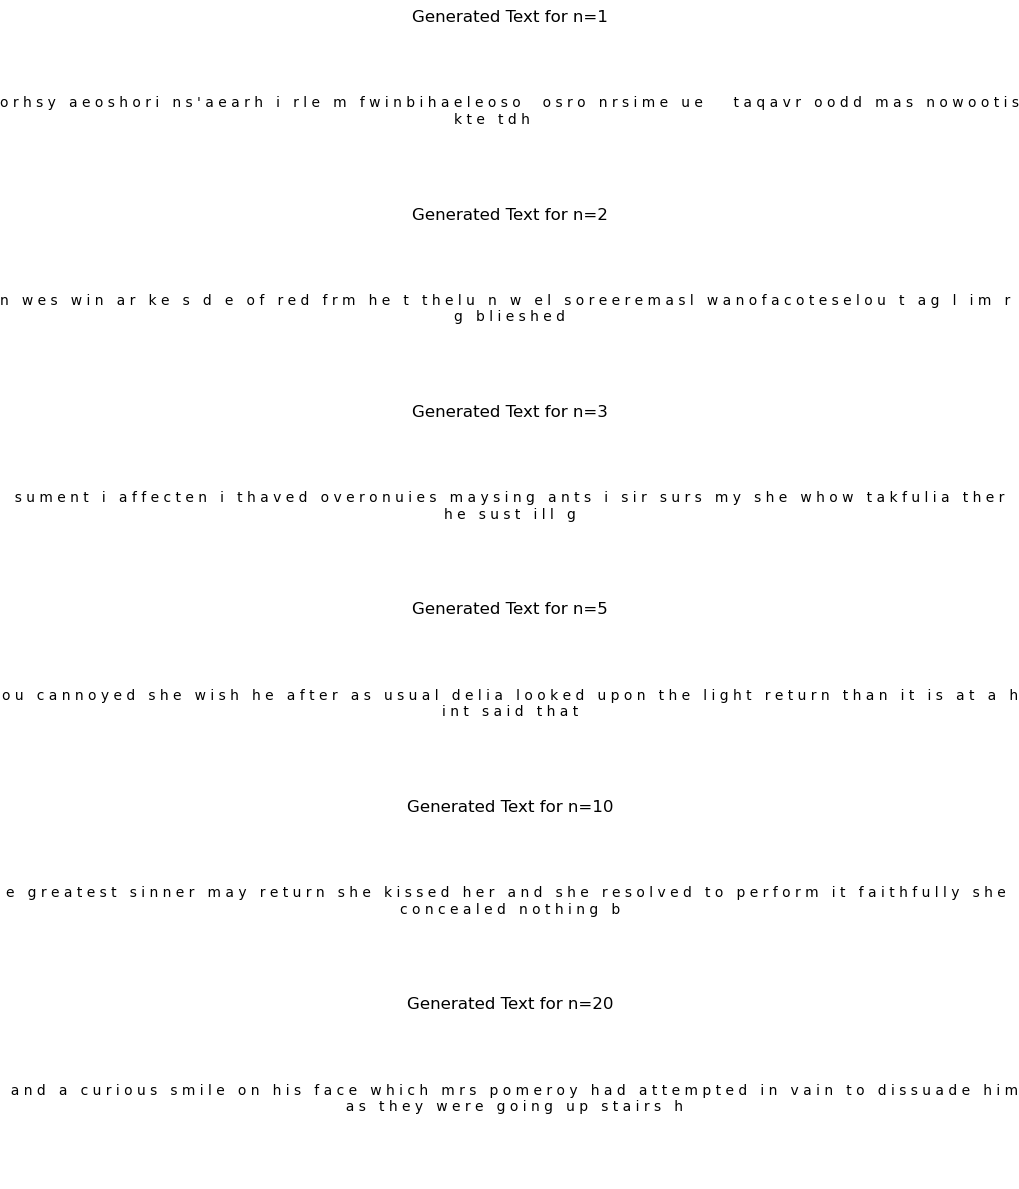

In [21]:
import matplotlib.pyplot as plt

# Modify the sample_ngram function to take the n-gram model and length as inputs
def sample_ngram(model, length):
    n, nminusone_grams, ngrams = model

    start_index = np.random.choice(list(range(len(nminusone_grams.keys()))), p=list(nminusone_grams.values()))
    start = list(nminusone_grams.keys())[start_index]
    sampled = list(start)

    for _ in range(length):
        if n == 1:
            prev = tuple([])
        else:
            prev = tuple(sampled[-1*(n-1):])
        next = np.random.choice(list(ngrams[prev].keys()), p=list(ngrams[prev].values()))
        sampled.append(next)

    return " ".join(sampled)

# Set n values to test and the length of the generated text
n_values = [1, 2, 3, 5, 10, 20]  # Different n-gram values
length = 100  # Length of generated text

# Generate samples for each n-gram value and store them
samples = {}
for n in n_values:
    model = ngrams_from_text(train_text, n)
    samples[n] = sample_ngram(model, length)

# Plot the results
plt.figure(figsize=(10, 12))
for i, n in enumerate(n_values, 1):
    plt.subplot(len(n_values), 1, i)
    plt.text(0.5, 0.5, samples[n], ha='center', va='center', wrap=True)
    plt.title(f"Generated Text for n={n}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Formatted more nicely, we can see that the 5-gram and the 10-gram aren't too bad. They definitely are English, and take words and tone from the English text they are trained on. Let's take a look at the perplexity to see what is going on. Perplexity is a metric used to evaluate language models, measuring how well a model predicts a sample of text. Lower perplexity indicates the model assigns higher probabilities to the correct sequences, reflecting better performance. 

In [24]:
import numpy as np

def calculate_perplexity(model, test_text):
    n, nminusone_gram_counts, ngram_counts = model
    tokens = list(test_text)  # Tokenize the test text (you can adapt this if needed)
    N = len(tokens)
    log_prob_sum = 0.0
    
    for i in range(n - 1, N):
        nminusone_gram = tuple(tokens[i - (n - 1):i])
        word = tokens[i]
        
        # Get the probability P(word | nminusone_gram)
        if nminusone_gram in ngram_counts and word in ngram_counts[nminusone_gram]:
            prob = ngram_counts[nminusone_gram][word]
        else:
            # Assign a small probability if the n-gram was not seen in training
            prob = 1e-10  # Smoothing factor for unseen n-grams

        # Accumulate the log probability
        log_prob_sum += np.log(prob)

    # Calculate perplexity
    perplexity = np.exp(-log_prob_sum / N)
    return perplexity

This function, `calculate_perplexity`, computes the perplexity of a language model on a given text. It iterates over the text to calculate the probability of each word based on its preceding words, using precomputed n-gram counts. For unseen n-grams, it applies a small smoothing factor, then combines all log probabilities to compute perplexity, which reflects the model’s ability to predict the test text.

In [32]:
nish_unigram = ngrams_from_text(train_text, 1)
print("Perplexity for unigram model:", calculate_perplexity(nish_unigram, test_text))

nish_unigram = ngrams_from_text(train_text, 3)
print("Perplexity for unigram model:", calculate_perplexity(nish_unigram, test_text))

nish_bigram = ngrams_from_text(train_text, 5)
print("Perplexity for bigram model:", calculate_perplexity(nish_bigram, test_text))

nish_trigram = ngrams_from_text(train_text, 50)
print("Perplexity for trigram model:", calculate_perplexity(nish_trigram, test_text))

Perplexity for unigram model: 16.766124040620827
Perplexity for unigram model: 6.7743869298704835
Perplexity for bigram model: 89.19401986608806
Perplexity for trigram model: 1185015436.170623


We can see off the bat that the perplexity improves at first, but then gets much, much worse. Let's see this visually. 

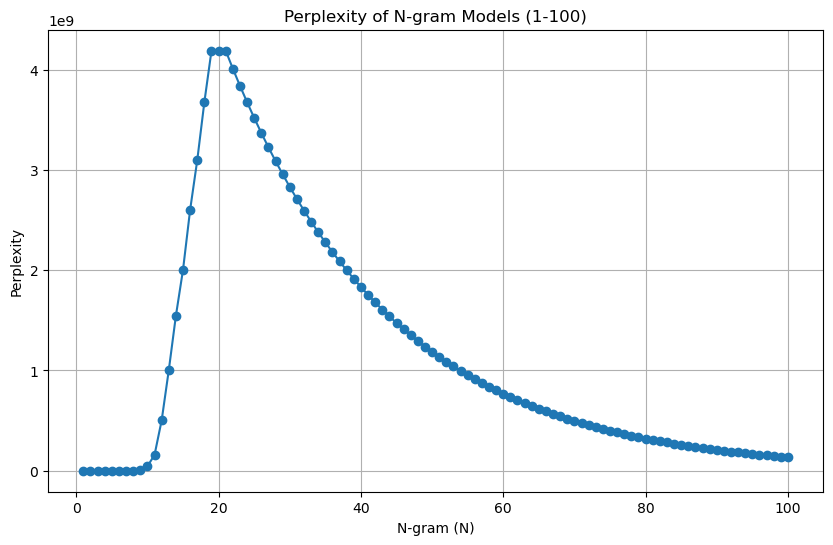

In [28]:
import matplotlib.pyplot as plt

# Initialize a list to store perplexity values for each n-gram
perplexities = []

# Calculate and store perplexity for each n-gram model (1 to 100)
for n in range(1, 101):
    n_gram_model = ngrams_from_text(train_text, n)
    perplexity = calculate_perplexity(n_gram_model, test_text)
    perplexities.append(perplexity)

# Plot the perplexity values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), perplexities, marker='o')
plt.xlabel("N-gram (N)")
plt.ylabel("Perplexity")
plt.title("Perplexity of N-gram Models (1-100)")
plt.grid(True)
plt.show()

Our plot confirms that the perplexity at first gets better, and then gets much worse, and then starts to improve a bit again. Let's zoom in on grams 1 - 5 to see where our lowest perplexity is. 

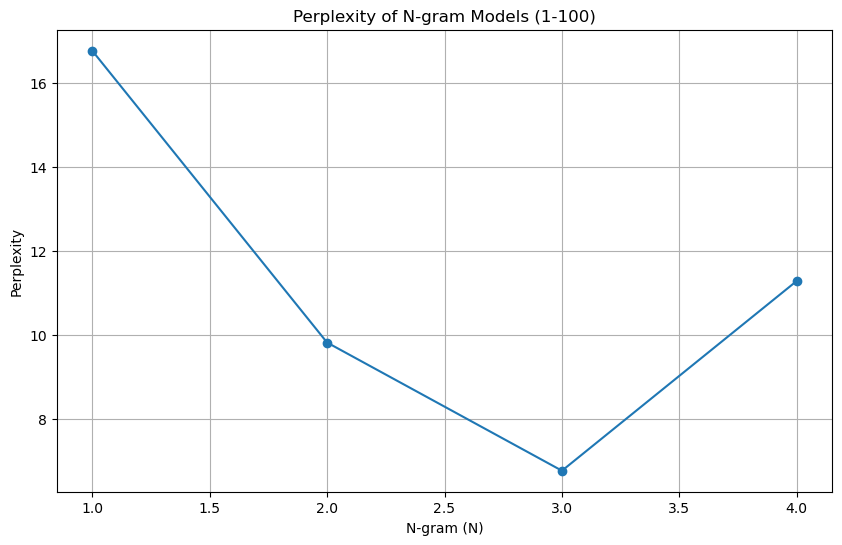

In [40]:
import matplotlib.pyplot as plt

# Initialize a list to store perplexity values for each n-gram
perplexities = []

# Calculate and store perplexity for each n-gram model (1 to 100)
for n in range(1, 5):
    n_gram_model = ngrams_from_text(train_text, n)
    perplexity = calculate_perplexity(n_gram_model, test_text)
    perplexities.append(perplexity)

# Plot the perplexity values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), perplexities, marker='o')
plt.xlabel("N-gram (N)")
plt.ylabel("Perplexity")
plt.title("Perplexity of N-gram Models (1-4)")
plt.grid(True)
plt.show()

Our lowest perplexity is at 3, indicating that the trigram is the best fit for our model. It is also fairly coherent, leading us to conclude that the trigram works fairly well for training on English data. As an autocomplete feature, you would save 2 - 3 keystrokes per work you type as it is able to correctly predict 2-3 letters consistently in a row. 